In [1]:
# Set path to root and hide warnings
from init import init_notebook
init_notebook()

# Other imports
import config
import numpy as np

from IPython.display import clear_output
from myutils import load_json, store_json, load_pickle, store_pickle, print_all_stats
from tqdm import tqdm

# MNIST - Sentiment Learning Demo

In this demo, we see the 'Sentiment Learner' as a strictly defined rule: even vs odd numbers. We define zero (False) as even, and one (True) as odd.

## Create the Model

To create the model, we should define a mapping function which maps the ground truth labels corresponding the images (i.e. the indices the images try to represent in this case) to a binary representation. For this demo, I've chosen to train the model to learn to recognize even and odd numbers, based on a (live) manually curated training-set.

In [2]:
def mapping(x):
    return x % 2

In [3]:
%%capture

from sentiment_learner import SentimentLearner

model = SentimentLearner(
    name='mnist',
    data_path='data/mnist/',
    mapping=mapping
)

## Init Training Set

Manually add a small set of samples before the first training epoch starts, this because otherwise the model would drastically overfit (since only one sample would cover only one possible answer, which results in a model that thinks that this answer is always gonna be the right choice). 

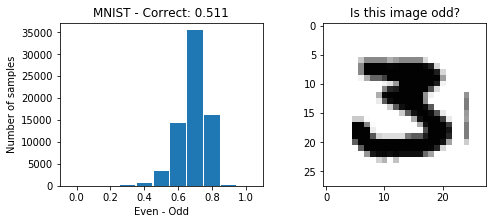

Is image '6059' odd? [Yes/No] : y


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [04:51<00:00,  4.29s/it]


In [4]:
for _ in tqdm(range(config.INIT_BATCH)):
    model.iterate(train=False)

## Evaluate and Train Loop


Evaluate the model to get the 'most uncertain sample', which will then be used to manually evaluate and next is added to the training set. The idea is to learn a decent data-distribution only after a relatively few manually curated samples.

Note: Newly added training data keeps also occurring in the evaluation data, there is no specific reason for this.

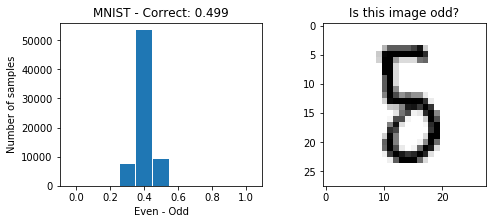

In [ ]:
while True:
    model.iterate()